In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('BeijingPM20100101_20151231.csv',encoding='utf-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


### 空值处理

In [4]:
#  查看缺失值情况
pd.DataFrame(data.isnull().sum())

,0
No,0
year,0
month,0
day,0
hour,0
season,0
PM_Dongsi,27532
PM_Dongsihuan,32076
PM_Nongzhanguan,27653
PM_US Post,2197


In [5]:
data_new = data.dropna(subset=["PM_Dongsi", "PM_Dongsihuan", "PM_Nongzhanguan", "PM_US Post"])

In [6]:
pd.DataFrame(data_new.isnull().sum())
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 27824 to 52582
Data columns (total 18 columns):
No                 19380 non-null int64
year               19380 non-null int64
month              19380 non-null int64
day                19380 non-null int64
hour               19380 non-null int64
season             19380 non-null int64
PM_Dongsi          19380 non-null float64
PM_Dongsihuan      19380 non-null float64
PM_Nongzhanguan    19380 non-null float64
PM_US Post         19380 non-null float64
DEWP               19377 non-null float64
HUMI               19357 non-null float64
PRES               19357 non-null float64
TEMP               19377 non-null float64
cbwd               19377 non-null object
Iws                19377 non-null float64
precipitation      19085 non-null float64
Iprec              19085 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 2.8+ MB


### 生成箱线图、直方图，查看是否有异常值

In [ ]:
# # import matplotlib.pyplot as plt
# #使用 plt 的 .boxplot() 方法绘制箱线图
# plt.figure()
# plt.subplot2grid((1,4),(0,0))

# plt.subplot(111)
# plt.boxplot(data_new.iloc[:,6:9])

# plt.subplot(122)
# plt.boxplot(data_new["PM_Dongsihuan"])

# plt.subplot(133)
# plt.boxplot(data_new["PM_Nongzhanguan"])

# plt.subplot(142)
# plt.boxplot(data_new["PM_US Post"])
# plt.show()

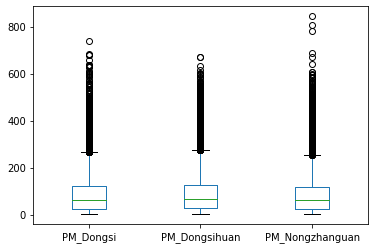

In [7]:
data_new.iloc[:,6:9].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002409845BB48>,
      dtype=object)

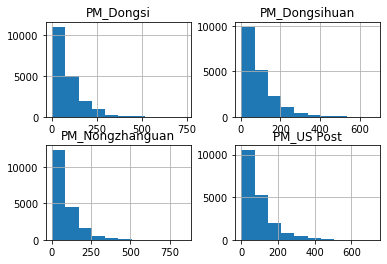

In [8]:
data_new.iloc[:,6:10].hist()

### 分组

In [9]:
data_new.iloc[:,6].head()

27824    117.0
27825    131.0
27826    141.0
27828    169.0
27829    169.0
Name: PM_Dongsi, dtype: float64

In [10]:
#  依据特征PM_dongsi创造离散特征
PM_dongsi_new = []
for PM in data_new.iloc[:,6]:
    if 0 < PM <=35:
        PM_dongsi_new.append(1)  #  良好
    elif 35 < PM <= 75:
        PM_dongsi_new.append(2)  # 轻度污染
    elif 75 < PM <= 150:
        PM_dongsi_new.append(3)  #中度污染
    elif 150 < PM:
        PM_dongsi_new.append(4)  #重度污染        
#PM_dongsi_new
a1=pd.Series(PM_dongsi_new)
#data_new =pd.concat(['data_new','a'])
b=a1.value_counts()

## 1.不同程度的污染所占用的时间比例

In [11]:
def list_sum(l):
    sum=0
    for item in l:
        sum+=item
    return sum
b=a1.value_counts()
l_new=list(map(lambda x:'{:.0%}'.format(x/list_sum(b)),b))
print(l_new)

['33%', '26%', '24%', '17%']


In [13]:
#  依据特征PM_dongsi创造离散特征
PM_dongsihuan_new = []
for PM in data_new.iloc[:,7]:
    if 0 < PM <=35:
        PM_dongsihuan_new.append(1)  #  良好
    elif 35 < PM <= 75:
        PM_dongsihuan_new.append(2)  # 轻度污染
    elif 75 < PM <= 150:
        PM_dongsihuan_new.append(3)  #中度污染
    elif 150 < PM:
        PM_dongsihuan_new.append(4)  #重度污染        
#PM_dongsi_new
a2=pd.Series(PM_dongsihuan_new)
#data_new =pd.concat(['data_new','a'])
b=a2.value_counts()
def list_sum(l):
    sum=0
    for item in l:
        sum+=item
    return sum
c=a2.value_counts()
l_new=list(map(lambda x:'{:.0%}'.format(x/list_sum(c)),c))
print(l_new)

['30%', '27%', '24%', '19%']


In [14]:
#  依据特征PM_nongzhanguan创造离散特征
PM_nongzhanguan_new = []
for PM in data_new.iloc[:,8]:
    if 0 < PM <=35:
        PM_nongzhanguan_new.append(1)  #  良好
    elif 35 < PM <= 75:
        PM_nongzhanguan_new.append(2)  # 轻度污染
    elif 75 < PM <= 150:
        PM_nongzhanguan_new.append(3)  #中度污染
    elif 150 < PM:
        PM_nongzhanguan_new.append(4)  #重度污染        
#PM_dongsi_new
a3=pd.Series(PM_nongzhanguan_new)
#data_new =pd.concat(['data_new','a'])
d=a3.value_counts()
def list_sum(l):
    sum=0
    for item in l:
        sum+=item
    return sum
l_new=list(map(lambda x:'{:.0%}'.format(x/list_sum(d)),d))
print(l_new)

['33%', '26%', '24%', '17%']


## 2.计算各个年度平均值

In [15]:
data_new.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
27824,27825,2013,3,5,8,1,117.0,166.0,140.0,150.0,-6.0,59.0,1019.0,1.0,cv,0.89,0.0,0.0
27825,27826,2013,3,5,9,1,131.0,165.0,152.0,163.0,-8.0,38.0,1019.0,5.0,cv,1.78,0.0,0.0
27826,27827,2013,3,5,10,1,141.0,173.0,128.0,172.0,-8.0,31.0,1018.0,8.0,cv,2.67,0.0,0.0
27828,27829,2013,3,5,12,1,169.0,182.0,3.0,181.0,-9.0,23.0,1017.0,11.0,cv,4.45,0.0,0.0
27829,27830,2013,3,5,13,1,169.0,169.0,3.0,187.0,-9.0,22.0,1015.0,12.0,cv,5.34,0.0,0.0


In [16]:
data1=data_new.groupby(['year', 'month'])['PM_Dongsi'].mean()
data1[2013]

month
3     117.474026
4      64.149618
5      90.085169
6     110.403263
7      72.196013
8      64.064815
9      83.837633
10    103.003236
11     82.899718
12     88.823270
Name: PM_Dongsi, dtype: float64

In [17]:
data2=data_new.groupby(['year', 'month'])['PM_Dongsihuan'].mean()
data2[2013]

month
3     128.043831
4      63.024427
5     100.339207
6     119.573427
7      85.393688
8      70.208333
9      82.992413
10    101.637540
11     83.889831
12     93.571429
Name: PM_Dongsihuan, dtype: float64

In [18]:
data3=data_new.groupby(['year', 'month'])['PM_Nongzhanguan'].mean()
data3[2013]

month
3     115.670455
4      56.691603
5      75.609398
6     108.643357
7      74.737542
8      64.655864
9      81.059181
10     94.800971
11     83.274011
12     91.371134
Name: PM_Nongzhanguan, dtype: float64